In [4]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import json

In [5]:
import tensorflow as tf

from tensorflow.keras.layers import Embedding, Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D;
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras import layers

In [6]:
with open("tokenizer.json", "r") as jsonfile:
    tokenizer = json.load(jsonfile)

tokenizer = tf.keras.preprocessing.text.tokenizer_from_json(tokenizer)

In [7]:
with open("dados/assuntoTratado.csv", "r") as csvfile:
    assuntos = np.genfromtxt(csvfile, delimiter=",")
    assuntos = assuntos.astype(np.int32)

In [8]:
with open("dados/conteudoTratado.csv", "r") as csvfile:
    conteudos = np.genfromtxt(csvfile, delimiter=",")
    conteudos = conteudos.astype(np.int32)

In [9]:
vocab = len(tokenizer.word_index)

In [10]:
maxContent = max(len(tokens) for tokens in conteudos)
maxSubject = len(np.unique(assuntos))

In [11]:
assuntos = pd.get_dummies(assuntos).values

In [13]:
size = len(conteudos)

xTrain = conteudos[0:int(size*0.7)]
yTrain = assuntos[0:int(size*0.7)]

xVal = conteudos[int(size*0.7):int(size*0.8)]
yVal = assuntos[int(size*0.7):int(size*0.8)]

xTest = conteudos[int(size*0.8):]
yTest = assuntos[int(size*0.8):]

2021 1011 7072


In [14]:
model = Sequential()

model.add(Embedding(vocab, 128, input_length = maxContent)),
model.add(Conv1D(64, 3, activation = "relu")),
model.add(MaxPooling1D(3)),
model.add(Conv1D(32, 3, activation = "relu")),
model.add(GlobalMaxPooling1D()),
model.add(Dense(5, activation = "softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5476, 128)         11872512  
                                                                 
 conv1d (Conv1D)             (None, 5474, 64)          24640     
                                                                 
 max_pooling1d (MaxPooling1  (None, 1824, 64)          0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 1822, 32)          6176      
                                                                 
 global_max_pooling1d (Glob  (None, 32)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 5)                 1

In [16]:
model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics=["accuracy"])

In [23]:
yTrain

array([[ True, False, False, False, False],
       [ True, False, False, False, False],
       [ True, False, False, False, False],
       ...,
       [False,  True, False, False, False],
       [False,  True, False, False, False],
       [False,  True, False, False, False]])

In [17]:
neuralNetwork = model.fit(xTrain, yTrain, validation_data = (xVal, yVal), epochs=10, batch_size=1)

Epoch 1/10


7072/7072 [==============================] - 611s 86ms/step - loss: 0.3108 - accuracy: 0.8877 - val_loss: 0.1636 - val_accuracy: 0.9446
Epoch 2/10
7072/7072 [==============================] - 602s 85ms/step - loss: 0.0902 - accuracy: 0.9680 - val_loss: 0.3655 - val_accuracy: 0.9100
Epoch 3/10
7072/7072 [==============================] - 601s 85ms/step - loss: 0.0311 - accuracy: 0.9895 - val_loss: 0.4712 - val_accuracy: 0.9189
Epoch 4/10
7072/7072 [==============================] - 601s 85ms/step - loss: 0.0178 - accuracy: 0.9942 - val_loss: 0.3730 - val_accuracy: 0.9357
Epoch 5/10
7072/7072 [==============================] - 604s 85ms/step - loss: 0.0204 - accuracy: 0.9962 - val_loss: 1.5982 - val_accuracy: 0.8506
Epoch 6/10
7072/7072 [==============================] - 602s 85ms/step - loss: 0.0119 - accuracy: 0.9966 - val_loss: 0.6167 - val_accuracy: 0.9308
Epoch 7/10
7072/7072 [==============================] - 602s 85ms/step - loss: 0.0151 - accuracy: 0.9975 - val_loss:

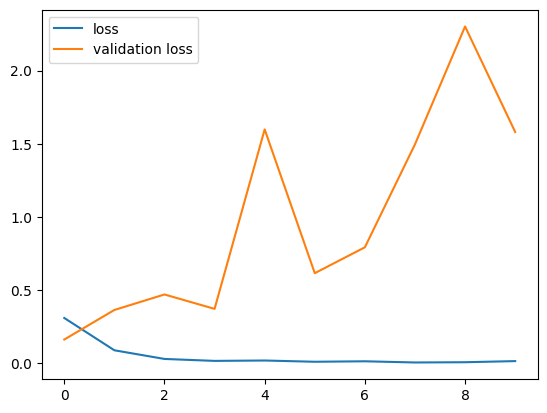

In [40]:
plt.plot(neuralNetwork.history['loss'], label = 'loss')
plt.plot(neuralNetwork.history["val_loss"], label = "validation loss")
plt.legend()

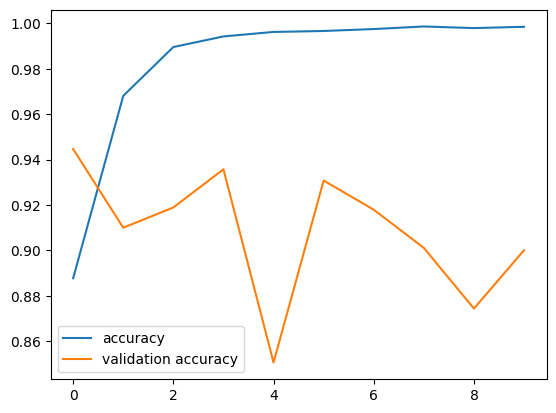

In [41]:
plt.plot(neuralNetwork.history['accuracy'], label = 'accuracy')
plt.plot(neuralNetwork.history["val_accuracy"], label = "validation accuracy")
plt.legend()

In [85]:
assuntoTxt = ["economia", "esportes", "politica", "famosos","tecnologia"]

In [86]:
idx = 1555

In [87]:
inputPred = xTest[idx].reshape(1, maxContent)

In [88]:
tokenizer.sequences_to_texts(inputPred)

['quatro anos atrás o termo fintech não existia no brasil mas os amigos thiago alvarez e benjamin gleason já apostavam em uma ideia ambiciosa de negócio mapear os hábitos financeiros das pessoas e dar a elas conselhos sobre o que fazer com seu dinheiro deu tão certo que o guiabolso aplicativo de finanças pessoais lançado em 2014 hoje ostenta 4 5 milhões de usuários e chegou a ser apontado como a 3ª startup mais desejada do brasil pelo ranking do linkedin desde sua criação o aplicativo recebeu r 215 milhões em cinco rodadas de investimentos com aportes de entidades como o international finance corporation ifc braço financeiro do banco mundial thiago alvarez fundador do guiabolso recebeu o g1 na nova sede da empresa na cobertura do we work em pinheiros onde trabalham cerca de 200 funcionários ele vê espaço para atrair até 30 milhões de clientes bancários seu principal alvo em busca de um guia sobre como investir e controlar os gastos domésticos para alvarez há um ambiente regulatório ext

In [89]:
prediction = model.predict(inputPred)

1/1 [==============================] - 0s 54ms/step


In [90]:
prediction

array([[2.3648525e-02, 9.7635150e-01, 1.5493067e-12, 3.8513944e-23,
        2.1058058e-08]], dtype=float32)

In [91]:
assuntoTxt[yTest[idx].argmax()]

'economia'

In [92]:
assuntoTxt[prediction.argmax()]

'esportes'

In [93]:
yTest.shape

(2021, 5)

In [94]:
xTest.shape

(2021, 5476)

In [96]:
scores = model.evaluate(xTest, yTest)

63/64 [============================>.] - ETA: 0s - loss: 2.3481 - accuracy: 0.8586

InvalidArgumentError: Graph execution error:

Detected at node sequential/embedding/embedding_lookup defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\traitlets\config\application.py", line 1053, in launch_instance

  File "C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\kernelapp.py", line 736, in start

  File "C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2032.0_x64__qbz5n2kfra8p0\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2032.0_x64__qbz5n2kfra8p0\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2032.0_x64__qbz5n2kfra8p0\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue

  File "C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\kernelbase.py", line 505, in process_one

  File "C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell

  File "C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\kernelbase.py", line 740, in execute_request

  File "C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\zmqshell.py", line 546, in run_cell

  File "C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell

  File "C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell

  File "C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async

  File "C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes

  File "C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code

  File "C:\Users\migue\AppData\Local\Temp\ipykernel_13192\2410820607.py", line 1, in <module>

  File "C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py", line 2296, in evaluate

  File "C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py", line 4108, in run_step

  File "C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py", line 2066, in test_function

  File "C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py", line 2049, in step_function

  File "C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py", line 2037, in run_step

  File "C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py", line 1917, in test_step

  File "C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py", line 590, in __call__

  File "C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\sequential.py", line 398, in call

  File "C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\functional.py", line 515, in call

  File "C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\embedding.py", line 272, in call

indices[3,169] = 92754 is not in [0, 92754)
	 [[{{node sequential/embedding/embedding_lookup}}]] [Op:__inference_test_function_325645]